<a href="https://colab.research.google.com/github/anggello-anteliz09/pythonAnalisisPPA/blob/main/ppaScriptAnalisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas matplotlib openpyxl textblob

Datos guardados en analisis_sentimientos.xlsx


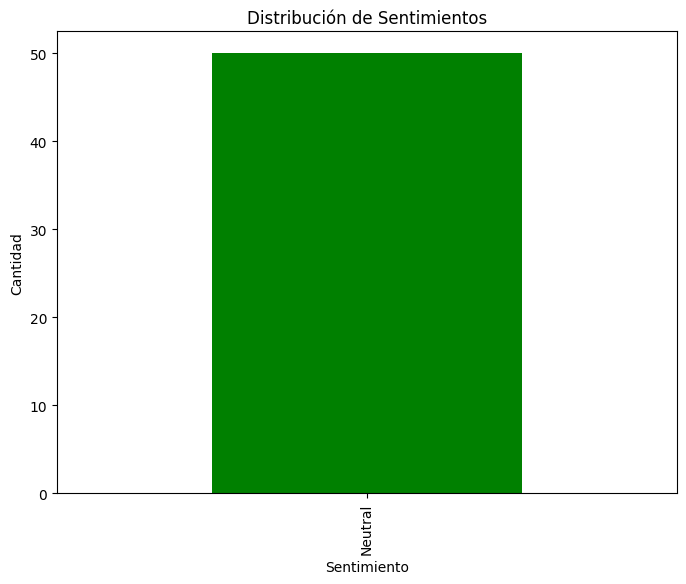

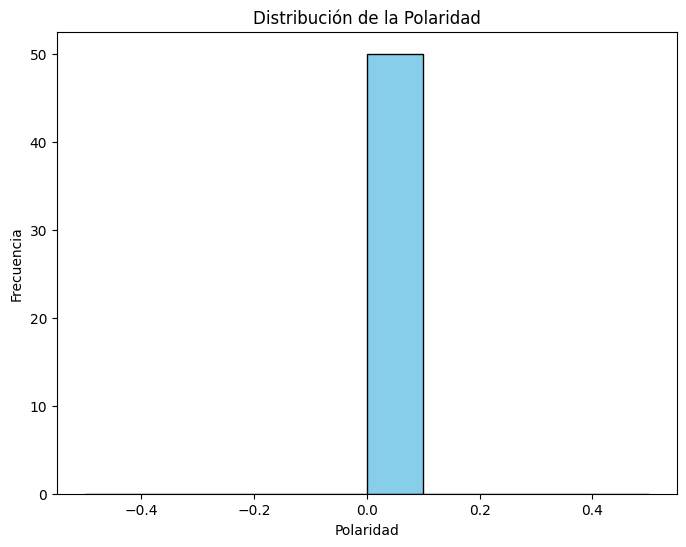

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import random

# Función para analizar el sentimiento de un texto
def analizar_sentimiento(texto):
    blob = TextBlob(texto)
    polaridad = blob.sentiment.polarity
    subjetividad = blob.sentiment.subjectivity

    if polaridad > 0:
        sentimiento = "Positivo"
    elif polaridad < 0:
        sentimiento = "Negativo"
    else:
        sentimiento = "Neutral"

    return sentimiento, polaridad, subjetividad

# Función para generar datos aleatorios
def generar_datos_aleatorios(num_datos):
    textos_aleatorios = [
        "Me encanta este producto.",
        "Este es el peor servicio que he recibido.",
        "El ambiente es neutral, no me convence.",
        "Estoy muy satisfecho con los resultados.",
        "No recomendaría este lugar a nadie.",
        "La atención al cliente es aceptable, pero puede mejorar.",
        "Un día fantástico, me siento increíble.",
        "Esto ha sido una completa decepción."
    ]
    datos = []
    for _ in range(num_datos):
        texto = random.choice(textos_aleatorios)
        sentimiento, polaridad, subjetividad = analizar_sentimiento(texto)
        datos.append([texto, sentimiento, polaridad, subjetividad])
    return datos

# Función para guardar los resultados en Excel
def guardar_en_excel(datos, nombre_archivo):
    df = pd.DataFrame(datos, columns=["Texto", "Sentimiento", "Polaridad", "Subjetividad"])
    df.to_excel(nombre_archivo, index=False)
    print(f"Datos guardados en {nombre_archivo}")

# Función para generar gráficos
def generar_grafico(datos):
    df = pd.DataFrame(datos, columns=["Texto", "Sentimiento", "Polaridad", "Subjetividad"])

    # Gráfico de barras para sentimientos
    plt.figure(figsize=(8, 6))
    df['Sentimiento'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
    plt.title('Distribución de Sentimientos')
    plt.ylabel('Cantidad')
    plt.xlabel('Sentimiento')
    plt.show()

    # Gráfico de polaridad
    plt.figure(figsize=(8, 6))
    plt.hist(df['Polaridad'], bins=10, color='skyblue', edgecolor='black')
    plt.title('Distribución de la Polaridad')
    plt.xlabel('Polaridad')
    plt.ylabel('Frecuencia')
    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    num_datos = 50  # Número de datos aleatorios a generar
    datos = generar_datos_aleatorios(num_datos)

    # Guardar resultados en un archivo Excel
    nombre_archivo = "analisis_sentimientos.xlsx"
    guardar_en_excel(datos, nombre_archivo)

    # Generar gráficos
    generar_grafico(datos)